In [1]:
#hide code segments from display
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this notebook is hidden for easier reading.
To toggle code display, click <a href="javascript:code_toggle()">here</a>.''')

# The Hair Diffraction Experiment

Diffraction is the bending of waves around an object or aperture similar to the wavelength .  When it happens it is as though the obstacle or slit the wave has to pass though emit waves in all directions.  If you follow how this waves superpose ahead of the obstacle, what you will see is a pattern of light and shadows showing the constructive and destructive interference of the waves.  These interferences are closely related to the shape of the object diffracting the waves.

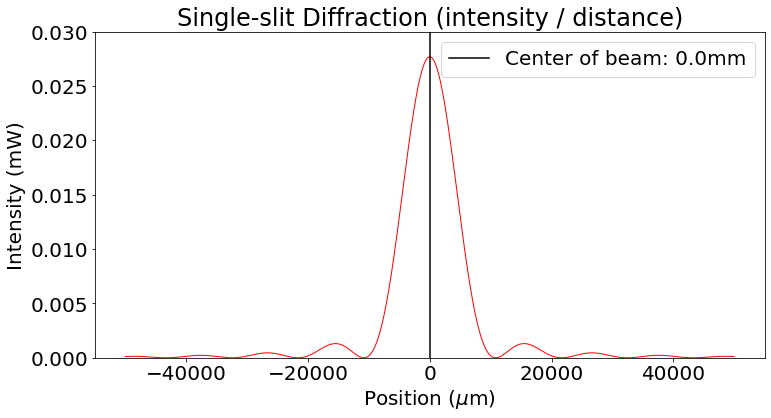

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# Set default font size for plots:
font = {'size'   : 20}
plt.rc('font',**font)

def sinc(x):
    if (x != 0):
        return np.sin(np.pi * x) / (np. pi * x)
    else:
        return 1
sinc = np.vectorize(sinc)

'''
slitWidth  = float(input("slitWidth: ")) #2500          # 2.5mm
wavelength = float(input("wavelength: ")) #0.650         # 650nm
distance   = float(eval(input("distance: "))) #10.3 * 10**6  # 10.3m
'''
slitWidth  = 60          # 2.5mm
wavelength = 0.650         # 650nm
distance   = 1 * 10**6  # 10.3m

#result_mm = float(input("result: "))
#result_mm = 10.5

#Visualizing a single diffractor
amplitude = 5 # the power of the laser (mW) as marked on the laser point. The accuracy of this value is trivial.
x = np.arange(-50000, 50000, 10) # numerical bounds and resolution of the graph (micron)
F = sinc(slitWidth * x / wavelength / distance)
intensity = amplitude / (wavelength * distance) * (slitWidth * F)**2

plt.figure(1, (12, 6))
plt.plot(x, intensity, linewidth=1, color='r') # red indicates the intensity
#result = result_mm * 1000
plt.axvline(x = 0,color='k', label="Center of beam: "+str(0.0)+"mm")
#plt.axvline(x = result, color='b', label="Obtained result: "+str(result_mm)+"mm") # blue indicated your result indicated earlier
#plt.xlim((0, 50000))
plt.ylim((0, 0.03))
plt.xlabel(r'Position ($\mu$m)')
plt.ylabel(r'Intensity (mW)')
plt.legend(loc='best')
plt.title("Single-slit Diffraction (intensity / distance)")
plt.show()

# The Diffraction Model

In order to understand the variables involved in the diffraction please answer the following questions. 

## Questions:

1) Change the distance to the background wall.  Describe what happens

2) What is the effect of changing the width of the hair?

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import math
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
# Set default font size for plots:
font = {'size'   : 20}
plt.rc('font',**font)

def hair_diffrac(slitWidth,wavelength,distance):
    '''
    slitWidth  = float(input("slitWidth: ")) #2500          # 2.5mm
    wavelength = float(input("wavelength: ")) #0.650         # 650nm
    distance   = float(eval(input("distance: "))) #10.3 * 10**6  # 10.3m
    '''
    def sinc(x):
        if (x != 0):
            return np.sin(np.pi * x) / (np. pi * x)
        else:
            return 1
    sinc = np.vectorize(sinc)
    #slitWidth  = 60          # 2.5mm
    #wavelength = 0.650         # 650nm
    #distance   = 1 * 10**6  # 10.3m

    #result_mm = float(input("result: "))
    #result_mm = 10.5

    #Visualizing a single diffractor
    wavelength=wavelength*1e-3 #nm
    distance=distance*1e4 #cm
    amplitude = 5 # the power of the laser (mW) as marked on the laser point. The accuracy of this value is trivial.
    x = np.arange(-30000, 30000, 10) # numerical bounds and resolution of the graph (mm)
    F = sinc(slitWidth * x / wavelength / distance)
    intensity = amplitude / (wavelength * distance) * (slitWidth * F)**2

    plt.figure(1, (12, 6))
    plt.plot(x*1e-3, intensity, linewidth=1, color='r') # red indicates the intensity
    #result = result_mm * 1000
    plt.axvline(x = 0,color='k', label="Center of beam: "+str(0.0)+"mm")
    #plt.axvline(x = result*1e-3, color='b', label="Obtained result: "+str(result_mm)+"mm") # blue indicated your result indicated earlier
    #plt.xlim((0, 50000))
    plt.ylim((0, 0.006))
    plt.xlabel(r'Position ($mm$))')
    plt.ylabel(r'Intensity (mW)')
    plt.legend(loc='best')
    plt.title("Single-slit Diffraction (intensity / distance)")
    plt.show()
    return

interactive(hair_diffrac, slitWidth = (20,80,20),wavelength=(630,670,10),distance=(1,120,20),continuous_update=False)

interactive(children=(IntSlider(value=40, description='slitWidth', max=80, min=20, step=20), IntSlider(value=6…